<a href="https://colab.research.google.com/github/q890003/ML_logistic-regression-EM/blob/master/ML_hw4_1_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


[[146.44129558]
 [-19.8795125 ]
 [-14.53882889]]


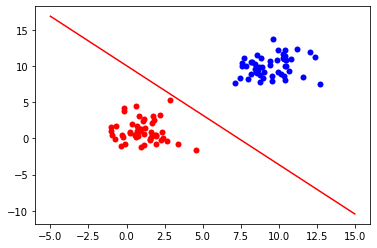

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
#generate number points (x,y),    x ~ N(mean_x, var_x), y ~ N(mean_y, var_y)



def gen_data( N1, N2, num_pts):
    mean_x, var_x = N1[0], N1[1]
    mean_y, var_y = N2[0], N2[1]
    sigma_x, sigma_y = var_x**(0.5), var_y**(0.5)

    points_x, points_y = [], []
    for i in range(num_pts):
        z_x = np.sum(np.random.uniform(0.0, 1.0, 12)) - 6
        z_y = np.sum(np.random.uniform(0.0, 1.0, 12)) - 6
        #formula: z = (x-m)/sigma -> x= z*sigma + mean
        gen_value_x = z_x *sigma_x + mean_x
        gen_value_y = z_y *sigma_y + mean_y
        points_x.append(gen_value_x)
        points_y.append(gen_value_y)
    return points_x, points_y

def sigmoid(X, w):
    # print(w)
    # print(X)
    Xw = X.dot(w)
    sigmoids = np.zeros((2*50,1), dtype=float)
    for i in range(len(Xw)):
        # if Xw[i] >= 300:
        #     sigmoids[i] = 1
        # if Xw[i] <= -300:
        #     sigmoids[i] = 0
        # else:
            sigmoids[i] = 1/(1+np.exp(-1 * Xw[i] ))
    # for i in range(len(Xw)):
    #     # print(sigmoids[i],"\t",Xw[i])
    return sigmoids

#init input
N = 50
#class 1 
c1_parameter_x = (1,2)   #(mean, var)
c1_parameter_y = (1,2)
#class 2
c2_parameter_x = (10,2)
c2_parameter_y = (10,2)
w = np.zeros((3,1), dtype= float)
""""""

#generate 2 classes data.
c1_pts_x, c1_pts_y = gen_data( c1_parameter_x, c1_parameter_y, num_pts=50)
c2_pts_x, c2_pts_y = gen_data( c2_parameter_x, c2_parameter_y, num_pts=50)
pts_x, pts_y = c1_pts_x+c2_pts_x, c1_pts_y+c2_pts_y

#set design matrix
X = np.zeros((2*N,3), dtype=float)
X[:,0], X[:,1], X[:,2] =  1, pts_x, pts_y

#set lebel
Label = np.zeros((2*N, 1), dtype=float)
Label[:N,0] = 1

while True:
    adjust = X.T.dot( Label - sigmoid(X,w))
    w = w + adjust
    if np.all(np.less(np.absolute(adjust),[0.0001])):
        break
print(w)

#decision boundary
db_x = np.linspace(-5,15, 10)
db_y = -1 * (w[0]+ db_x* w[1] )/w[2]
plt.figure()
plt.scatter(c1_pts_x,c1_pts_y,linewidths=0.001,color = 'red')
plt.scatter(c2_pts_x,c2_pts_y,linewidths=0.001,color = 'blue')
plt.plot(db_x, db_y, color = 'red')



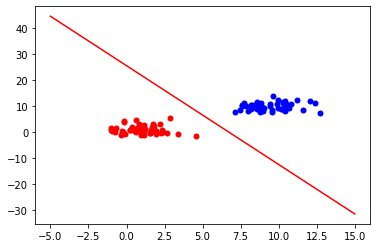

In [16]:
w = np.zeros((3,1), dtype=float)
D = np.zeros((2*N, 2*N), dtype=float)

for i in range(20):
    sigs = sigmoid(X, w)
    sigs = sigs*(1-sigs) 
    for i in range(2*N):
        D[i,i] =  sigs[i]
    H = X.T.dot(D).dot(X)
    delta_f = X.T.dot(Label - sigmoid(X,w))

    if np.linalg.det(H) == 0:
        adjust = delta_f
        w = w + adjust
    else:
        H_inv = np.linalg.inv(H)
        adjust = H_inv.dot(delta_f)
        w = w + adjust
    if np.all(np.less(np.absolute(adjust), 0.001)):
        break

#decision boundary
db_x = np.linspace(-5,15, 10)
db_y = -1 * (w[0]+ db_x* w[1] )/w[2]
plt.figure()
plt.scatter(c1_pts_x,c1_pts_y,linewidths=0.001,color = 'red')
plt.scatter(c2_pts_x,c2_pts_y,linewidths=0.001,color = 'blue')
plt.plot(db_x, db_y, color = 'red')